https://www.kaggle.com/code/akhilreddysalibindla/capstone-project#Decision-Tree-Regression
https://www.kaggle.com/code/devraai/flight-price-prediction-analysis 
https://www.kaggle.com/code/kifayatullahe/flight-price-prediction-98-accuracy 
https://medium.com/@amit25173/linear-regression-vs-random-forest-7288522be3aa

In [255]:
import sys
!{sys.executable} -m pip install seaborn 
!python -m pip install imbalanced-learn

In [295]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

In [257]:
flight_df = pd.read_csv("C:\\Users\\Admin\\Downloads\\consolidated_flights.csv")

In [258]:
flight_df

,travel_date,booking_date,airport,num_connections,airline,airplane,flight_number,overnight,travel_class,price,is_within_budget
0,2025-05-14,2025-05-12 21:29:24,HAN,3,Cathay Pacific,Airbus A330,CX 742,No,Business Class,2553.0,No
1,2025-05-14,2025-05-12 21:29:24,HKG,3,Cathay Pacific,Boeing 777,CX 880,Yes,Business Class,2553.0,No
2,2025-05-14,2025-05-12 21:29:24,LAX,3,American,Airbus A321,AA 1499,No,Economy,2553.0,No
3,2025-05-14,2025-05-12 21:29:24,CLT,3,American,Boeing 737,AA 1330,No,First Class,2553.0,No
4,2025-05-14,2025-05-12 21:29:24,HAN,1,ANA,Boeing 787,NH 898,Yes,Business Class,2944.0,No
...,...,...,...,...,...,...,...,...,...,...,...
294,2025-05-14,2025-05-11 22:57:47,ICN,1,Asiana Airlines,Airbus A350,OZ 224,Yes,Economy,1162.0,No
295,2025-05-14,2025-05-11 22:57:47,HAN,1,Korean Air,Airbus A321neo,KE 442,No,Economy,1423.0,No
296,2025-05-14,2025-05-11 22:57:47,ICN,1,Korean Air,Boeing 777,KE 85,Yes,Economy,1423.0,No
297,2025-05-14,2025-05-11 22:57:47,HAN,1,Vietnam Airlines,Boeing 787,VN 384,No,Economy,2970.0,No


# Data Cleaning

In [259]:
flight_df

,travel_date,booking_date,airport,num_connections,airline,airplane,flight_number,overnight,travel_class,price,is_within_budget
0,2025-05-14,2025-05-12 21:29:24,HAN,3,Cathay Pacific,Airbus A330,CX 742,No,Business Class,2553.0,No
1,2025-05-14,2025-05-12 21:29:24,HKG,3,Cathay Pacific,Boeing 777,CX 880,Yes,Business Class,2553.0,No
2,2025-05-14,2025-05-12 21:29:24,LAX,3,American,Airbus A321,AA 1499,No,Economy,2553.0,No
3,2025-05-14,2025-05-12 21:29:24,CLT,3,American,Boeing 737,AA 1330,No,First Class,2553.0,No
4,2025-05-14,2025-05-12 21:29:24,HAN,1,ANA,Boeing 787,NH 898,Yes,Business Class,2944.0,No
...,...,...,...,...,...,...,...,...,...,...,...
294,2025-05-14,2025-05-11 22:57:47,ICN,1,Asiana Airlines,Airbus A350,OZ 224,Yes,Economy,1162.0,No
295,2025-05-14,2025-05-11 22:57:47,HAN,1,Korean Air,Airbus A321neo,KE 442,No,Economy,1423.0,No
296,2025-05-14,2025-05-11 22:57:47,ICN,1,Korean Air,Boeing 777,KE 85,Yes,Economy,1423.0,No
297,2025-05-14,2025-05-11 22:57:47,HAN,1,Vietnam Airlines,Boeing 787,VN 384,No,Economy,2970.0,No


In [260]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   travel_date       299 non-null    object 
 1   booking_date      299 non-null    object 
 2   airport           299 non-null    object 
 3   num_connections   299 non-null    int64  
 4   airline           299 non-null    object 
 5   airplane          299 non-null    object 
 6   flight_number     299 non-null    object 
 7   overnight         299 non-null    object 
 8   travel_class      299 non-null    object 
 9   price             297 non-null    float64
 10  is_within_budget  299 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 25.8+ KB


In [261]:
flight_df[flight_df["price"].isnull()]

,travel_date,booking_date,airport,num_connections,airline,airplane,flight_number,overnight,travel_class,price,is_within_budget
217,2025-05-14,2025-05-13 09:16:32,HAN,1,Air China,Airbus A321neo,CA 742,No,Economy,NaN,No
218,2025-05-14,2025-05-13 09:16:32,PEK,1,Air China,Boeing 747,CA 981,Yes,Economy,NaN,No


In [262]:
# Drop missing values
flight_df = flight_df.dropna(subset=["price"])

In [263]:
# Convert to datetime type
flight_df["travel_date"] = pd.to_datetime(flight_df["travel_date"])
flight_df["booking_date"] = pd.to_datetime(flight_df["booking_date"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_22164\629627261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_df["travel_date"] = pd.to_datetime(flight_df["travel_date"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_22164\629627261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_df["booking_date"] = pd.to_datetime(flight_df["booking_date"])


In [264]:
flight_df["airline"].unique()

array(['Cathay Pacific', 'American', 'ANA', 'United', 'Qatar Airways',
       'JAL', 'Emirates', 'Asiana Airlines', 'Vietnam Airlines',
       'EVA Air', 'Korean Air', 'Alaska', 'Jeju Air', 'Turkish Airlines',
       'Air Canada', 'Delta', 'STARLUX Airlines', 'China Airlines',
       'Philippine Airlines', 'Hong Kong Express'], dtype=object)

In [265]:
flight_df["airline_type"] =  np.where(flight_df["airline"].isin(["Jeju Air", "Hong Kong Express"]), "low-cost", "full-service")

C:\Users\Admin\AppData\Local\Temp\ipykernel_22164\3256975192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_df["airline_type"] =  np.where(flight_df["airline"].isin(["Jeju Air", "Hong Kong Express"]), "low-cost", "full-service")


Calculate how mnay days left from booking date to 17/06/2025

In [266]:
flight_df["days_left"] = (pd.to_datetime("2025-06-17") - flight_df["booking_date"]).dt.days

C:\Users\Admin\AppData\Local\Temp\ipykernel_22164\3945752955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_df["days_left"] = (pd.to_datetime("2025-06-17") - flight_df["booking_date"]).dt.days


In [267]:
flight_df["num_connections"].value_counts()

num_connections
1    158
2    135
3      4
Name: count, dtype: int64

In [268]:
flight_df["airline_type"].value_counts()

airline_type
full-service    290
low-cost          7
Name: count, dtype: int64

In [269]:
flight_df["travel_class"].value_counts()

travel_class
Economy           198
Business Class     93
First Class         6
Name: count, dtype: int64

# Feature Engineering

In [270]:
cleaned_df = flight_df.copy()

In [271]:
encoder = OrdinalEncoder(categories=[['Economy', 'Business Class', 'First Class']])
cleaned_df['class_encoded'] = encoder.fit_transform(cleaned_df[['travel_class']])

In [272]:
cleaned_df[["class_encoded", "travel_class"]]

,class_encoded,travel_class
0,1.0,Business Class
1,1.0,Business Class
2,0.0,Economy
3,2.0,First Class
4,1.0,Business Class
...,...,...
294,0.0,Economy
295,0.0,Economy
296,0.0,Economy
297,0.0,Economy


In [273]:
# Overnight - 1, No - 0
le = LabelEncoder()
cleaned_df["overnight"] = le.fit_transform(cleaned_df["overnight"])

In [274]:
hot_enc = OneHotEncoder(handle_unknown='ignore')
cleaned_df = pd.get_dummies(cleaned_df, columns=["airline_type"], dtype="float")

# Exploratory Data Analysis

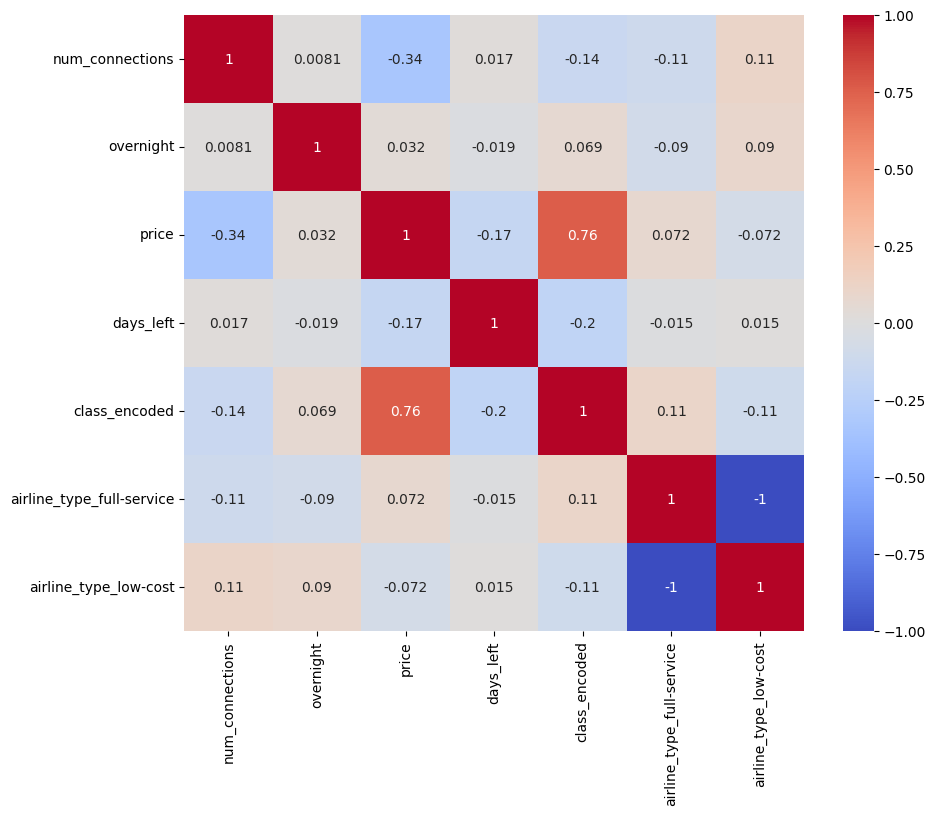

In [275]:
numeric_features = cleaned_df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features.corr(), annot=True, cmap="coolwarm")
plt.show()

The number of transit connections generate a significant difference in prices of boarding passes. There are no much low cost flights so it is hard to make any insights.

ValueError: Could not interpret value `airline_type` for `size`. An entry with this name does not appear in `data`.

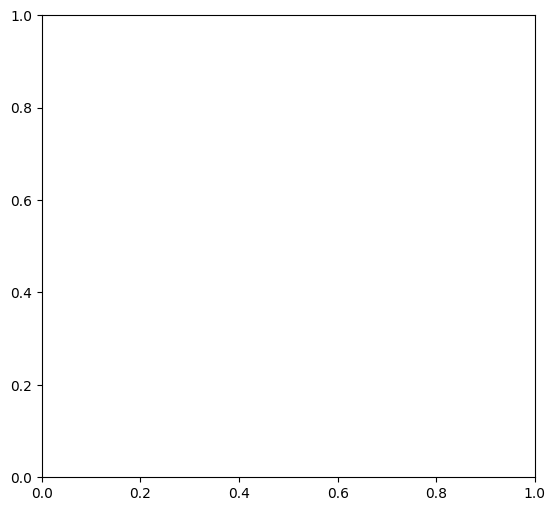

In [276]:
plt.figure(figsize = (14, 6))
# First plot
plt.subplot(1, 2, 1)  
sns.scatterplot(data=cleaned_df, y="price", x="num_connections", style="overnight", hue="travel_class", size="airline_type", sizes=(50, 100))
plt.title('Figure 1')

# Second plot
plt.subplot(1, 2, 2)
sns.boxplot(data=cleaned_df, x='num_connections', y='price', palette='coolwarm')
plt.title('Price Variation by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

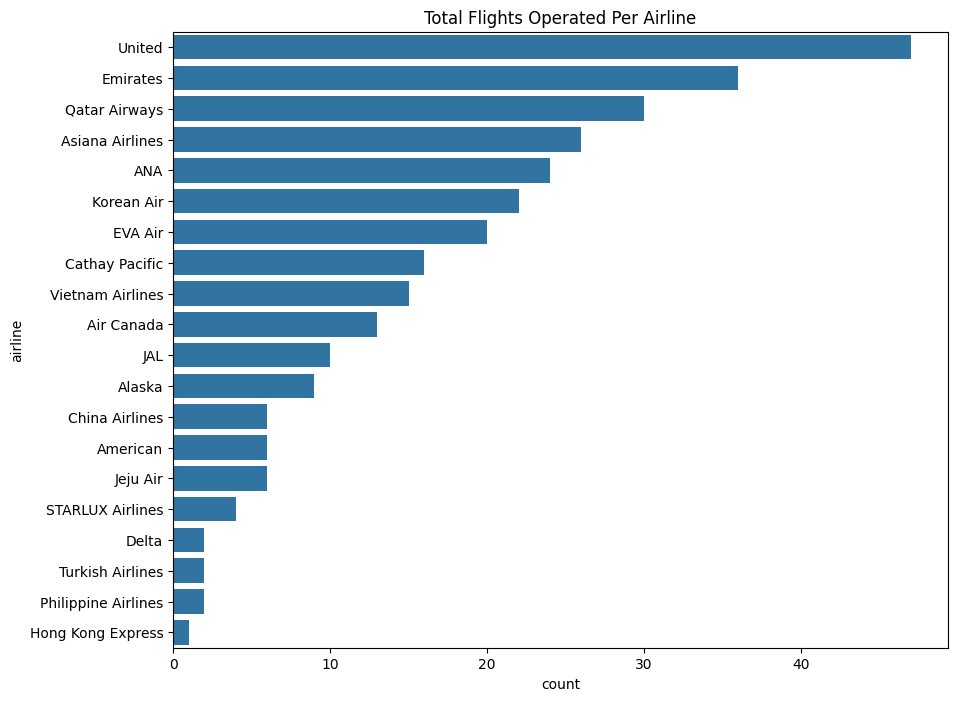

In [ ]:
# Sort the DataFrame by airline counts in descending order
cleaned_df_sorted = cleaned_df.sort_values(by=['airline'], key=lambda x: x.map(flight_df['airline'].value_counts()), ascending=False)

plt.figure(figsize=(10, 8))
sns.countplot(y='airline', data=cleaned_df_sorted)
plt.title("Total Flights Operated Per Airline")
plt.show()

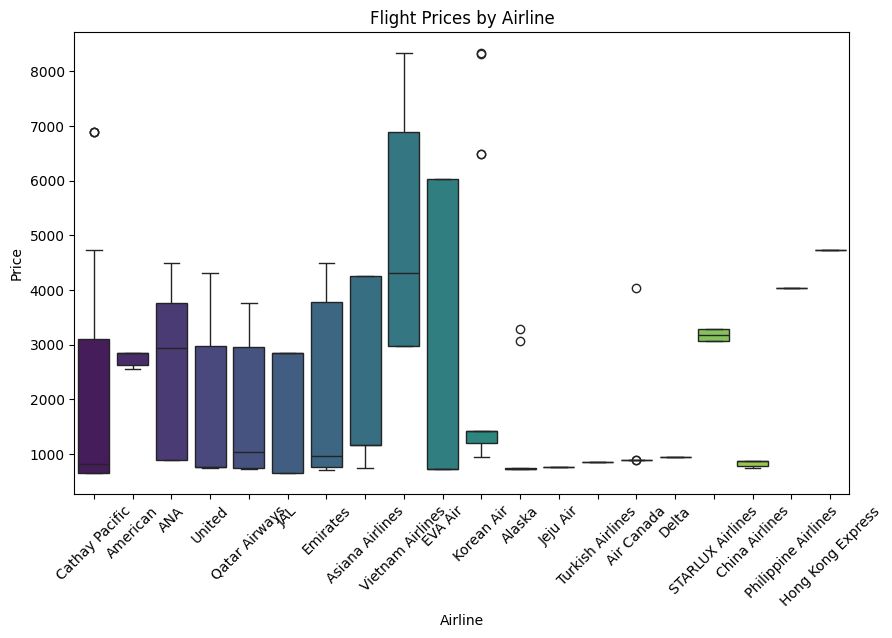

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_df, x="airline", y="price", palette="viridis", hue="airline", legend=False)
plt.xticks(rotation=45)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

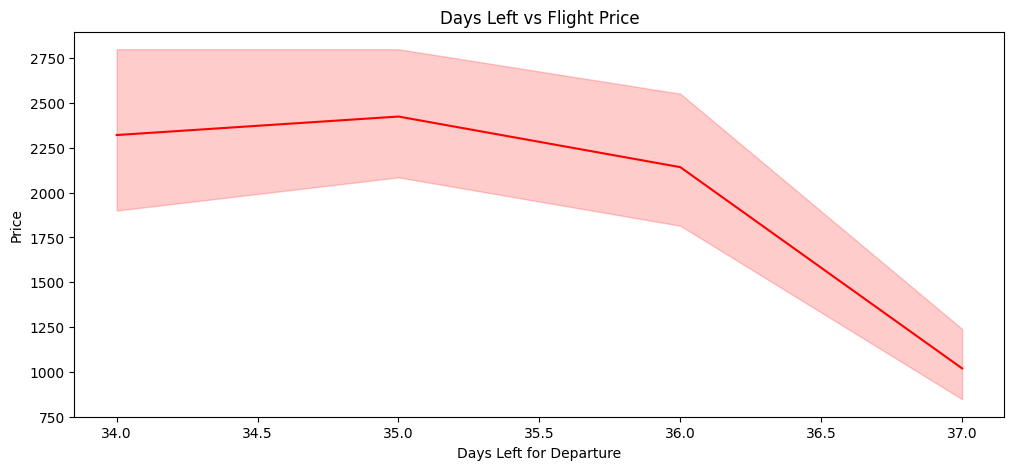

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=cleaned_df, x='days_left', y='price', color='red')
plt.title('Days Left vs Flight Price')
plt.xlabel('Days Left for Departure')
plt.ylabel('Price')
plt.show()

# Data Modelling

## Support Vector Machine

In [ ]:
flight_model = cleaned_df[cleaned_df["class_encoded"].isin([0, 1])]

In [ ]:
X = flight_model.drop(columns=["class_encoded", "travel_date", "booking_date", "airport", "airline", "airplane", "flight_number", "travel_class", "is_within_budget", "airline_type"])
y = flight_model["class_encoded"]

In [ ]:
cleaned_df.columns

Index(['travel_date', 'booking_date', 'airport', 'num_connections', 'airline',
       'airplane', 'flight_number', 'overnight', 'travel_class', 'price',
       'is_within_budget', 'airline_type', 'days_left', 'class_encoded'],
      dtype='object')

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=10, shuffle=True, train_size = 0.6)

In [ ]:
# Prediction function for SVM (sign function)
def predict_svm(X, beta, beta_0):
    return np.sign(beta_0 + np.dot(X, beta))

# Hinge Loss for SVM using X, y, beta, and beta_0
def hinge_loss(X, y, beta, beta_0):
    margin = y * (beta_0 + np.dot(X, beta))
    return np.mean(np.maximum(0, 1 - margin))

# Accuracy function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [ ]:
# Standard Scaling
def standardize(x):
  x = pd.DataFrame(x)
  x_std = np.empty([*x.shape])
  for i in range(x.shape[1]):
    a = x.iloc[:, i].values
    x_std[:, i] = (a - np.mean(a)) / (np.std(a))
  return x_std

In [307]:
from sklearn.svm import SVC
svm = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

# Convert class from 0 to -1, 1 remains the same
y_train_svm = (y_train * 2 - 1).astype(int)
y_test_svm = (y_test * 2 - 1).astype(int)

# Print result
print("Unique values in y_train_cls:", np.unique(y_train_svm))
print("Unique values in y_test_cls:", np.unique(y_test_svm))

Unique values in y_train_cls: [-1  1]
Unique values in y_test_cls: [-1  1]


### Original

In [304]:
# Train the model
svm_poly = SVC(kernel='poly', degree=1, C=1.0)  # You can change degree, C, etc.
svm_poly.fit(X_train, y_train)

# Make predictions
y_pred = svm_poly.predict(X_test)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy of SVM (poly kernel):", acc)

Accuracy of SVM (poly kernel): 0.9487179487179487


In [312]:
svm.fit(X_train, y_train_svm)

# Coefficients and intercept
coef_svm = svm.named_steps["svc"].coef_
intercept_svm = svm.named_steps["svc"].intercept_

# Print result
print("beta:", coef_svm)
print("beta_0:", intercept_svm)

# Evaluate SVM and accuracy score of training data
train_loss = hinge_loss(X_train, y_train_svm, coef_svm[0], intercept_svm)
train_acc = accuracy(y_train_svm, predict_svm(X_train, coef_svm[0], intercept_svm))

print(train_loss, train_acc)

beta: [[ 0.1791587   0.42254149  1.84588466 -0.11784552]]
beta_0: [-0.25597462]
1590.9048207632532 0.3448275862068966


### Oversampling (SMOTE)

In [309]:
# Balance class in training data
oversample = SMOTE()
X_train_1, y_train_1 = oversample.fit_resample(X_train, y_train)


# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
counter = Counter(y_train_1)
print(counter)

Counter({0.0: 114, 1.0: 114})


In [311]:
svm.fit(X_train_1, y_train_1)

# Coefficients and intercept
coef_svm = svm.named_steps["svc"].coef_
intercept_svm = svm.named_steps["svc"].intercept_

# Print result
print("beta:", coef_svm)
print("beta_0:", intercept_svm)

beta: [[ 0.05530215  0.15146773  2.15909504 -0.26212886]]
beta_0: [0.63711007]


In [ ]:
# Evaluate SVM and accuracy score of training data
train_loss = hinge_loss(X_train_1, y_train_1, coef_svm[0], intercept_svm)
train_acc = accuracy(y_train_1, predict_svm(X_train_1, coef_svm[0], intercept_svm))

print(train_loss, train_acc)

0.5 0.5


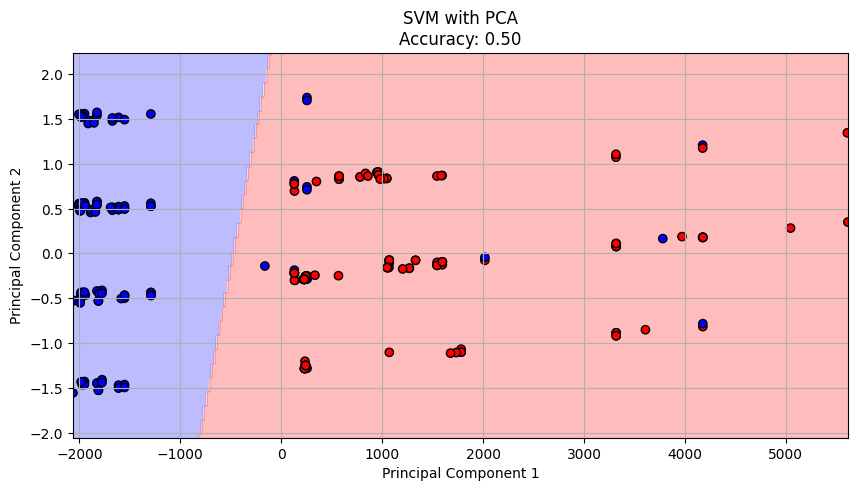

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_1)

svm.fit(X_train_pca, y_train_1)

# Update meshgrid ranges based on PCA-reduced data
xx, yy = np.meshgrid(
    np.linspace(X_train_pca[:, 0].min() - 0.5, X_train_pca[:, 0].max() + 0.5, 300),
    np.linspace(X_train_pca[:, 1].min() - 0.5, X_train_pca[:, 1].max() + 0.5, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z_svm = svm.predict(grid).reshape(xx.shape)

plt.figure(figsize=(10, 5))
plt.contourf(xx, yy, Z_svm, alpha=0.3, cmap='bwr')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_1, cmap='bwr', edgecolors='k')
plt.title(f"SVM with PCA\nAccuracy: {train_acc:.2f}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)

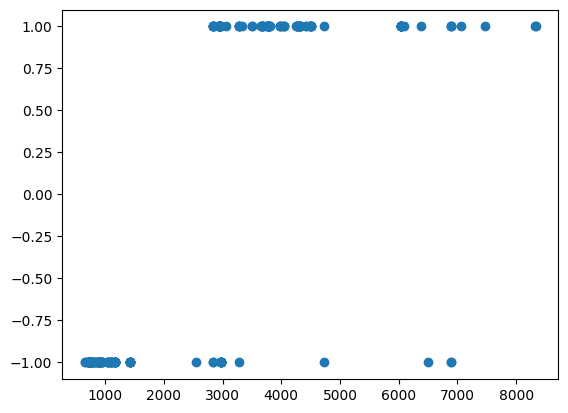

In [ ]:
plt.scatter(X_train_1["price"], y_train_svm)